In [28]:
#import dependencies

import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, inspect, func

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

In [12]:
#set up variable to csv for pandas plotting

clean_weather = 'clean_weather.csv'
hawaii_df = pd.read_csv(clean_weather)
hawaii_df = hawaii_df.drop('Unnamed: 0', 1)

#create engine to hawaii, inspect table

engine = create_engine("sqlite:///hawaii_db.sqlite", echo=False)
inspector = inspect(engine)
inspector.get_table_names()

['hawaii_db']

In [13]:
hawaii_df.head()

,station,date,prcp,tobs,name,latitude,longitude,elevation
0,USC00519397,2010-01-01,0.08,65,"WAIKIKI 717.2, HI US",21.2716,-157.8168,3.0
1,USC00519397,2010-01-02,0.00,63,"WAIKIKI 717.2, HI US",21.2716,-157.8168,3.0
2,USC00519397,2010-01-03,0.00,74,"WAIKIKI 717.2, HI US",21.2716,-157.8168,3.0
3,USC00519397,2010-01-04,0.00,76,"WAIKIKI 717.2, HI US",21.2716,-157.8168,3.0
4,USC00519397,2010-01-06,0.00,73,"WAIKIKI 717.2, HI US",21.2716,-157.8168,3.0


In [14]:
#set up parameters for df plotting,

filtered_year_hawaii_df = hawaii_df[(hawaii_df['date'] >= '2016-08-22') & (hawaii_df['date'] <= '2017-08-22')]
prcp_year_df = filtered_year_hawaii_df[['date', 'prcp']].set_index('date')
prcp_year_df.head()





,prcp
date,
2016-08-22,0.40
2016-08-23,0.00
2016-08-24,0.08
2016-08-25,0.08
2016-08-26,0.00


In [18]:
#not sure why matplot is plotting like this.  
#The dataframe shows up in order, yet the axis comes out all scrambled.  
#I used the x_compat=True as the homework creator suggested...need to move on to next plot



In [19]:
# get column names and data types

columns = inspector.get_columns('hawaii_db')
for c in columns:
    print(c['name'], c["type"])

id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs INTEGER
name TEXT
latitude FLOAT
longitude FLOAT
elevation FLOAT


In [20]:
#automap instead of creating a class

Base = automap_base()
Base.prepare(engine, reflect=True)
Base.classes.keys()
Hawaii = Base.classes.hawaii_db

#create session

session = Session(engine)

In [36]:
#testing engine, queries

hawaii_rainfall = session.query(Hawaii.date, Hawaii.prcp).\
    filter(Hawaii.date>= '2016-08-19').\
    filter(Hawaii.date<= '2017-08-19').\
    order_by(Hawaii.date).all()

prcp_df = pd.DataFrame(hawaii_rainfall, columns = ["date", 'prcp']).set_index(['date'])
prcp_df.head()

,prcp
date,
2016-08-19,0.04
2016-08-19,0.14
2016-08-19,0.07
2016-08-19,0.00
2016-08-19,0.31


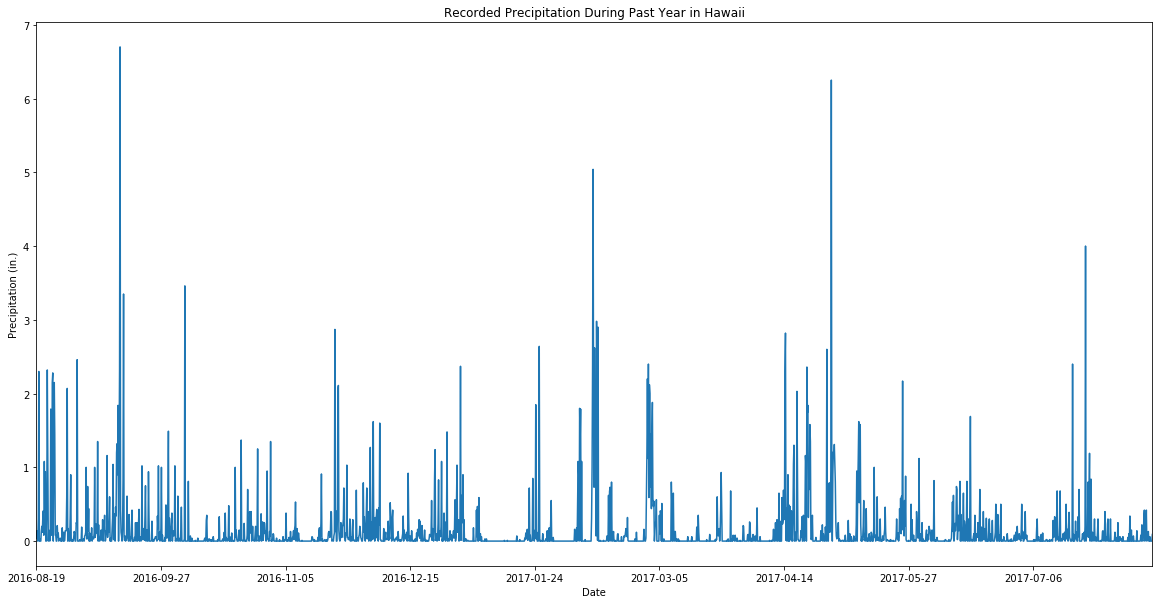

In [38]:
ax = prcp_df.plot(x_compat=True, figsize = (20,10), title='Recorded Precipitation During Past Year in Hawaii')
ax.set_xlabel('Date')
ax.set_ylabel("Precipitation (in.)")
ax.legend().set_visible(False)
plt.show()

In [22]:
#testing engine, queries

active_stations = session.query(Hawaii.station, func.count(Hawaii.tobs)).\
        group_by(Hawaii.station).order_by(func.count(Hawaii.station).desc())
list(active_stations)

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [43]:
#the previous query determined the station 'USC00519281' has the most observations on record.

active_station = session.query(Hawaii.tobs, func.count(Hawaii.tobs)).\
    filter(Hawaii.station == 'USC00519281').\
    filter(Hawaii.date >= '2016-08-19').\
    filter(Hawaii.date <= '2017-08-19').\
    group_by(Hawaii.tobs).all()
    
active_station



#counts = [x[1]for x in active_station]
#counts

#hist, bins = np.histogram(active_station, bins=12)

#center = (bins[:-1] + bins[1:]) / 2
#plt.bar(center, hist, align='center', width=width)
#plt.show()

[(59, 3),
 (60, 2),
 (61, 1),
 (62, 6),
 (63, 4),
 (64, 3),
 (65, 7),
 (66, 5),
 (67, 15),
 (68, 12),
 (69, 19),
 (70, 22),
 (71, 18),
 (72, 22),
 (73, 18),
 (74, 39),
 (75, 33),
 (76, 33),
 (77, 31),
 (78, 23),
 (79, 20),
 (80, 11),
 (81, 5),
 (82, 3),
 (83, 1)]

In [ ]:
def calc_temps(start_date,end_date):